In [1]:
# Motion energy model prediction for all ages by ROI -- new sign permutation diff test

In [2]:
# Functional imports
import os 
import numpy as np
import nibabel as nib

from data_prep_helpers import make_vol
from plotting_helpers import plot_lateral_only, plot_lateral_only_with_vmax, plot_surfaces, plot_surfaces_with_vmax
import data_prep_helpers_new as helpers_new
# Notebook specific imports
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%autosave 5

Autosaving every 5 seconds


In [3]:
# Set data location
directory = os.path.join(os.path.expanduser('~'), 'data-lisik3', 'imelizabeth', 'partly_cloudy-main', 'data')
print('Data location:', directory)

# Load masks
mask = nib.load(os.path.join(directory, 'adult_isc_mask.nii.gz'))
print('ISC Mask:', np.shape(mask))

group_mask = nib.load(os.path.join(directory, 'group_mask.nii.gz'))
print('Anatomical mask:', np.shape(group_mask))

# Load mask
MT_mask_resampled_bool = nib.load(os.path.join(directory, 'adult_MT_mask.nii.gz'))
print('MT Mask shape:', np.shape(MT_mask_resampled_bool))

# Load mask
STS_mask_resampled = nib.load(os.path.join(directory, 'adult_STS_mask.nii.gz'))
print('STS Mask shape:', np.shape(STS_mask_resampled))

Data location: /home/imelizabeth/data-lisik3/imelizabeth/partly_cloudy-main/data
ISC Mask: (79, 95, 68)
Anatomical mask: (79, 95, 68)
MT Mask shape: (79, 95, 68)
STS Mask shape: (79, 95, 68)


In [4]:
def rand_sign_flip_ROI(value):
    """
     Randomly flips signs for some ist of scalar values
    """
    return value * np.random.choice([-1,1])

def generate_null_ROI(data, n_permutations):
    """
    Generates a null distribution via a 1-sampled sign-flip permutation test.
    Returns a null distribution of size n_permutations.
    """
    
    null_dist = []

    for _ in range(n_permutations):
        # Randomly flip signs for each subject's data
        flipped_data = [rand_sign_flip_ROI(subject) for subject in data]
        
        # Calculate mean from sign flipped subject data
        flipped_mean = np.mean(flipped_data)
        
        # Store in null_dist
        null_dist.append(flipped_mean)

    return null_dist

In [5]:
#Load subject data - MOTION


moten_scores_34yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results','unthresholded_whole', '3-4-yrs_moten_only_scores_adult_isc_mask.npy')), axis=0)

moten_scores_5yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '5-yrs', 'encoding_results','unthresholded', '5-yrs_moten_only_scores_adult_isc_mask.npy')), axis=0)

moten_scores_7yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '7-yrs', 'encoding_results','unthresholded', '7-yrs_moten_only_scores_adult_isc_mask.npy')), axis=0)

moten_scores_812yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '8-12-yrs', 'encoding_results','unthresholded', '8-12-yrs_moten_only_scores_adult_isc_mask.npy')), axis=0)

moten_scores_adults_unthresholded = np.mean(np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_moten_only_scores_adult_isc_mask.npy')), axis=0)


<h1>Motion-MT</h1>

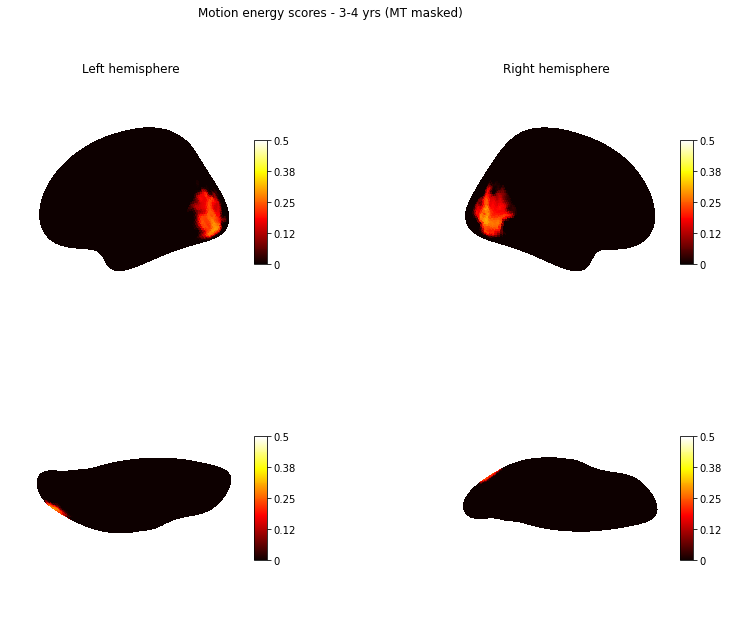

0.2192900868067552


In [6]:
# mask 3-4 yrs data - MT

moten_isc_volume_34yrs = make_vol(moten_scores_34yrs_unthresholded, mask)
moten_isc_volume_34yrs_array = moten_isc_volume_34yrs.get_fdata()
mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
moten_mt_volume_34yrs = moten_isc_volume_34yrs_array.copy()
moten_mt_volume_34yrs[mt_mask_array] = 0

moten_mt_volume_34yrs_image = nib.Nifti1Image(moten_mt_volume_34yrs, affine=moten_isc_volume_34yrs.affine, header=moten_isc_volume_34yrs.header)

plot_surfaces_with_vmax(vol=moten_mt_volume_34yrs_image, 
                            title='Motion energy scores - 3-4 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.5)

print(moten_isc_volume_34yrs_array[np.invert(mt_mask_array)].mean())

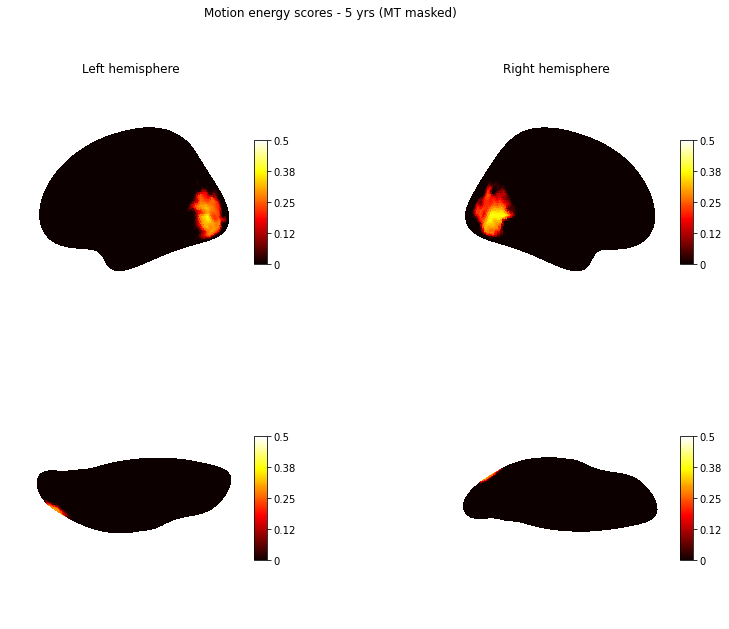

0.25298708791979674


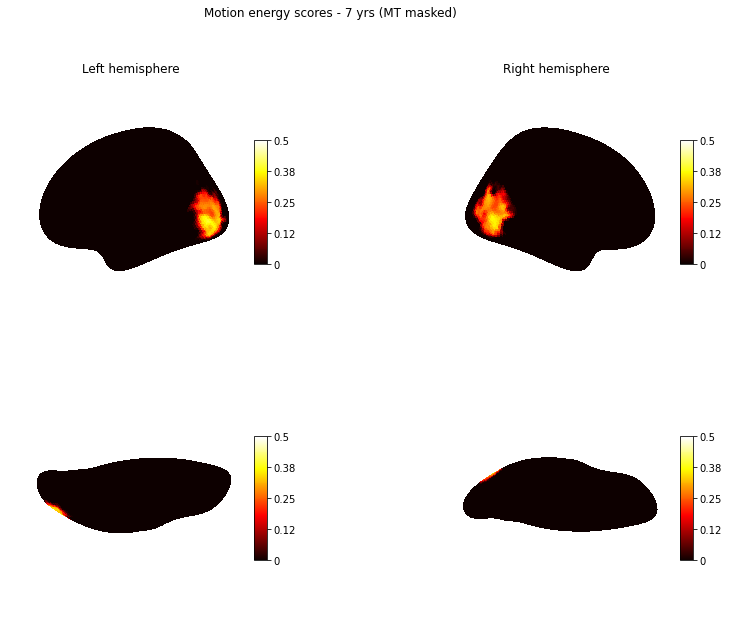

0.27481206716139794


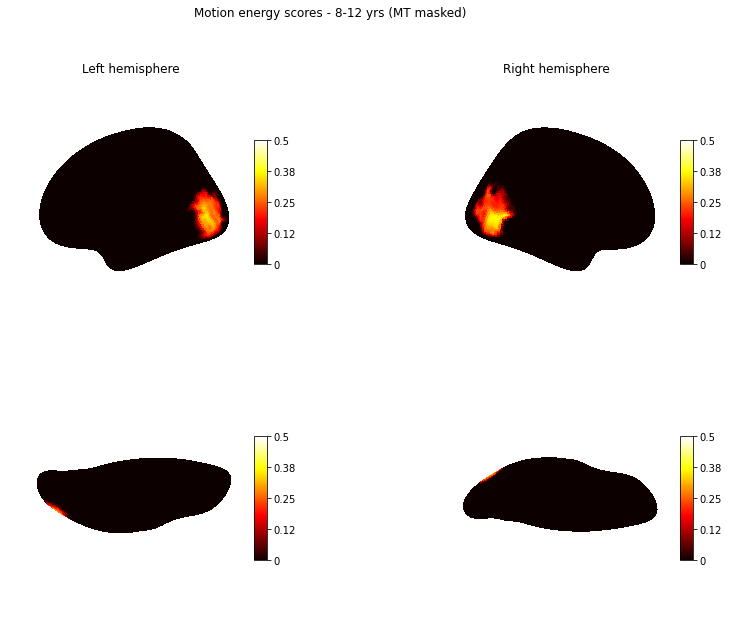

0.24269197450326396


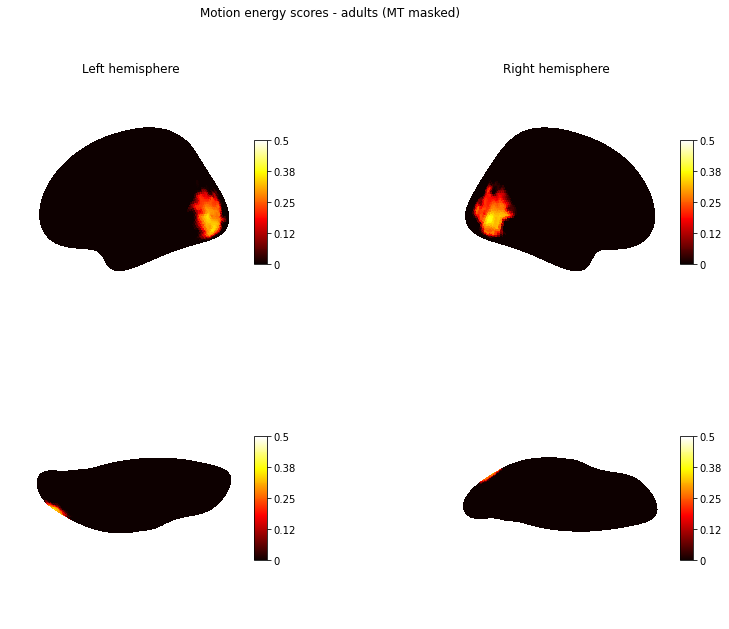

0.25271078378040734


In [7]:




# mask 5 yrs data - MT

moten_isc_volume_5yrs = make_vol(moten_scores_5yrs_unthresholded, mask)
moten_isc_volume_5yrs_array = moten_isc_volume_5yrs.get_fdata()
mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
moten_mt_volume_5yrs = moten_isc_volume_5yrs_array.copy()
moten_mt_volume_5yrs[mt_mask_array] = 0
moten_mt_volume_5yrs_image = nib.Nifti1Image(moten_mt_volume_5yrs, affine=moten_isc_volume_5yrs.affine, header=moten_isc_volume_5yrs.header)
# plot_lateral_only_with_vmax(vol=moten_mt_volume_5yrs_image, 
#                             title='Motion energy scores - 5 yrs (MT masked)', 
#                             vis_threshold=0, vmax=0.5)

plot_surfaces_with_vmax(vol=moten_mt_volume_5yrs_image, 
                            title='Motion energy scores - 5 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.5)

print(moten_isc_volume_5yrs_array[np.invert(mt_mask_array)].mean())

# mask 7 yrs data - MT

moten_isc_volume_7yrs = make_vol(moten_scores_7yrs_unthresholded, mask)
moten_isc_volume_7yrs_array = moten_isc_volume_7yrs.get_fdata()
mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
moten_mt_volume_7yrs = moten_isc_volume_7yrs_array.copy()
moten_mt_volume_7yrs[mt_mask_array] = 0
moten_mt_volume_7yrs_image = nib.Nifti1Image(moten_mt_volume_7yrs, affine=moten_isc_volume_7yrs.affine, header=moten_isc_volume_7yrs.header)
# plot_lateral_only_with_vmax(vol=moten_mt_volume_7yrs_image, 
#                             title='Motion energy scores - 7 yrs (MT masked)', 
#                             vis_threshold=0, vmax=0.5)

plot_surfaces_with_vmax(vol=moten_mt_volume_7yrs_image, 
                            title='Motion energy scores - 7 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.5)

print(moten_isc_volume_7yrs_array[np.invert(mt_mask_array)].mean())


# mask 8-12 yrs data - MT

moten_isc_volume_812yrs = make_vol(moten_scores_812yrs_unthresholded, mask)
moten_isc_volume_812yrs_array = moten_isc_volume_812yrs.get_fdata()
mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
moten_mt_volume_812yrs = moten_isc_volume_812yrs_array.copy()
moten_mt_volume_812yrs[mt_mask_array] = 0
moten_mt_volume_812yrs_image = nib.Nifti1Image(moten_mt_volume_812yrs, affine=moten_isc_volume_812yrs.affine, header=moten_isc_volume_812yrs.header)
plot_surfaces_with_vmax(vol=moten_mt_volume_812yrs_image, 
                            title='Motion energy scores - 8-12 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.5)

print(moten_isc_volume_812yrs_array[np.invert(mt_mask_array)].mean())


#mask adult data - MT

moten_isc_volume_adult = make_vol(moten_scores_adults_unthresholded, mask)
moten_isc_volume_adult_array = moten_isc_volume_adult.get_fdata()
mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
moten_mt_volume_adult = moten_isc_volume_adult_array.copy()
moten_mt_volume_adult[mt_mask_array] = 0
moten_mt_volume_adult_image = nib.Nifti1Image(moten_mt_volume_adult, affine=moten_isc_volume_adult.affine, header=moten_isc_volume_adult.header)
plot_surfaces_with_vmax(vol=moten_mt_volume_adult_image, 
                            title='Motion energy scores - adults (MT masked)', 
                            vis_threshold=0, vmax=0.5)

print(moten_isc_volume_adult_array[np.invert(mt_mask_array)].mean())

In [8]:
#load individual subject score
subj_moten_scores_34yrs_unthresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results','unthresholded_whole', '3-4-yrs_moten_only_scores_adult_isc_mask.npy')).T
print(subj_moten_scores_34yrs_unthresholded.shape)
n_34yrs = subj_moten_scores_34yrs_unthresholded.shape[-1]

subj_moten_scores_5yrs_unthresholded = np.load(os.path.join(
    directory, '5-yrs', 'encoding_results','unthresholded', '5-yrs_moten_only_scores_adult_isc_mask.npy')).T
print(subj_moten_scores_5yrs_unthresholded.shape)
n_5yrs = subj_moten_scores_5yrs_unthresholded.shape[-1]

subj_moten_scores_7yrs_unthresholded = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results','unthresholded', '7-yrs_moten_only_scores_adult_isc_mask.npy')).T
print(subj_moten_scores_7yrs_unthresholded.shape)
n_7yrs = subj_moten_scores_7yrs_unthresholded.shape[-1]

subj_moten_scores_812yrs_unthresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'encoding_results','unthresholded', '8-12-yrs_moten_only_scores_adult_isc_mask.npy')).T
print(subj_moten_scores_812yrs_unthresholded.shape)
n_812yrs = subj_moten_scores_812yrs_unthresholded.shape[-1]

subj_moten_scores_adults_unthresholded = np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_moten_only_scores_adult_isc_mask.npy')).T
print(subj_moten_scores_adults_unthresholded.shape)
n_adults = subj_moten_scores_adults_unthresholded.shape[-1]


(136543, 31)
(136543, 34)
(136543, 23)
(136543, 34)
(136543, 33)


In [9]:
### get the encoding performance correlation score

mt_mask_array = MT_mask_resampled_bool.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surface

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

(79, 95, 68)
510340
136543


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_null_difference_permute_groups(group1_scores, group2_scores, n_permutations):
    """
    Generates a null distribution of inter-group differences via group label permutation test.
    Returns a null distribution of dim n_permutations
    """
    all_scores = np.concatenate((group1_scores, group2_scores))
    null_dist = []

    for i in range(n_permutations):
        # Split data
        sample_group1, sample_group2 = train_test_split(all_scores, train_size=len(group1_scores), shuffle=True)

        # Calculate difference in means
        diff = np.mean(sample_group1) - np.mean(sample_group2)
        null_dist.append(diff)
    
    return null_dist


# Assuming you've extracted the mean ROI scores for each participant in both groups
group1_scores = np.array([mean_roi_score_for_subject_1, mean_roi_score_for_subject_2, ...])
group2_scores = np.array([mean_roi_score_for_subject_1, mean_roi_score_for_subject_2, ...])

null_distribution = generate_null_difference_permute_groups(group1_scores, group2_scores, 5000)
observed_difference = np.mean(group1_scores) - np.mean(group2_scores)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")


In [11]:
### adults
print(subj_moten_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_moten_scores_adults_unthresholded # change subj data to shape of the brain
mt_adult_score = volume_adult[mt_mask_array, :].mean(axis=0)
print(mt_adult_score.mean())

null_distribution = generate_null_ROI(mt_adult_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = mt_adult_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")




(136543, 33)
0.2527107837804073
(5000,)
Observed Mean: 0.2527107837804073
Chance Level from Null Distribution: 0.0007415425417686582
P-value: 0.0
The observed result is significantly different from chance


In [12]:
### 3-4-yrs
print(subj_moten_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_moten_scores_34yrs_unthresholded # change subj data to shape of the brain
mt_34yrs_score = volume_34yrs[mt_mask_array, :].mean(axis=0) #gives array of 31 participant's ROI mean (31,)
print(mt_34yrs_score.mean())

# Assuming you've extracted the mean ROI scores for each participant in both groups
#group1_scores = np.array([mean_roi_score_for_subject_1, mean_roi_score_for_subject_2, ...])
#group2_scores = np.array([mean_roi_score_for_subject_1, mean_roi_score_for_subject_2, ...])

null_distribution = generate_null_difference_permute_groups(mt_adult_score, mt_34yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_score) - np.mean(mt_34yrs_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)



## Chance comparison
null_distribution = generate_null_ROI(mt_34yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = mt_34yrs_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")


(136543, 31)
0.21929008680675532
(5000,)
0.033420696973651964
The difference between groups is not statistically significant.
0.0612
(5000,)
Observed Mean: 0.21929008680675532
Chance Level from Null Distribution: 0.0002197179442201555
P-value: 0.0
The observed result is significantly different from chance


In [13]:
### 5-yrs
print(subj_moten_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_moten_scores_5yrs_unthresholded # change subj data to shape of the brain
mt_5yrs_score = volume_5yrs[mt_mask_array, :].mean(axis=0)
print(mt_5yrs_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_score, mt_5yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_score) - np.mean(mt_5yrs_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(mt_5yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = mt_5yrs_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 34)
0.2529870879197966
(5000,)
-0.0002763041393893384
The difference between groups is not statistically significant.
0.989
(5000,)
Observed Mean: 0.2529870879197966
Chance Level from Null Distribution: -0.0015812399646553058
P-value: 0.0
The observed result is significantly different from chance


In [14]:

### 7-yrs
print(subj_moten_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_moten_scores_7yrs_unthresholded # change subj data to shape of the brain
mt_7yrs_score = volume_7yrs[mt_mask_array, :].mean(axis=0)
print(mt_7yrs_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_score, mt_7yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_score) - np.mean(mt_7yrs_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(mt_7yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = mt_7yrs_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")


(136543, 23)
0.27481206716139817
(5000,)
-0.022101283380990877
The difference between groups is not statistically significant.
0.232
(5000,)
Observed Mean: 0.27481206716139817
Chance Level from Null Distribution: 0.0015949864015384944
P-value: 0.0
The observed result is significantly different from chance


In [15]:
### 8-12-yrs
print(subj_moten_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_moten_scores_812yrs_unthresholded # change subj data to shape of the brain
mt_812yrs_score = volume_812yrs[mt_mask_array, :].mean(axis=0)
print(mt_812yrs_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_score, mt_812yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_score) - np.mean(mt_812yrs_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(mt_812yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = mt_812yrs_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 34)
0.24269197450326394
(5000,)
0.010018809277143353
The difference between groups is not statistically significant.
0.5132
(5000,)
Observed Mean: 0.24269197450326394
Chance Level from Null Distribution: -2.1923203150529558e-05
P-value: 0.0
The observed result is significantly different from chance


<h1>Motion-STS</h1>

0.1600147600880097
0.1592852483526967
0.18187301658448346
0.1675658173166127
0.17008748372523738


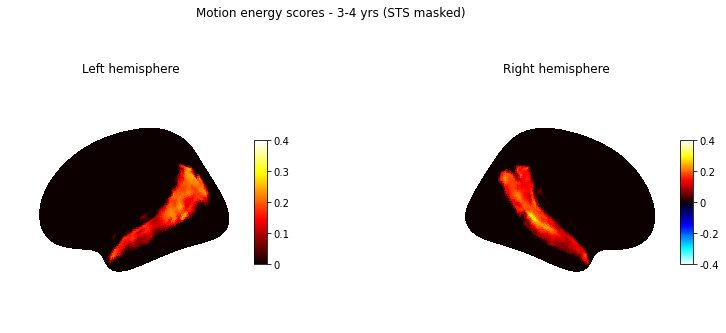

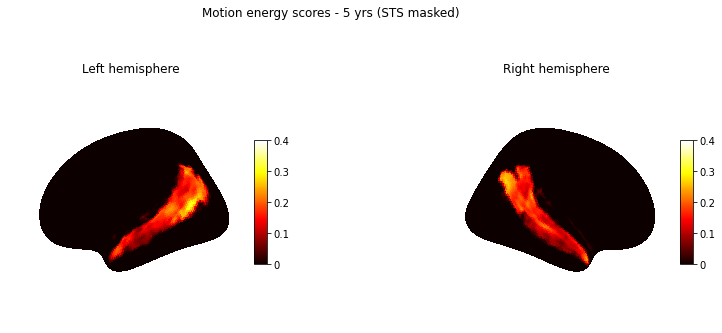

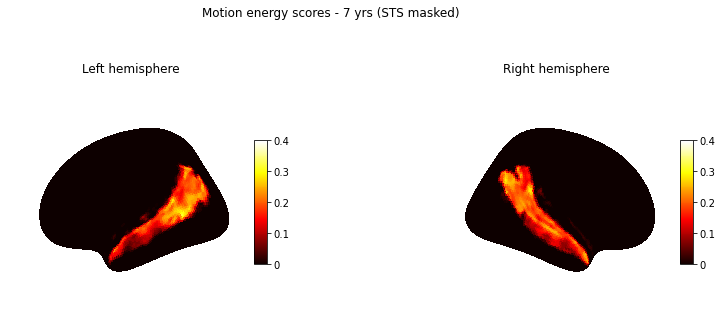

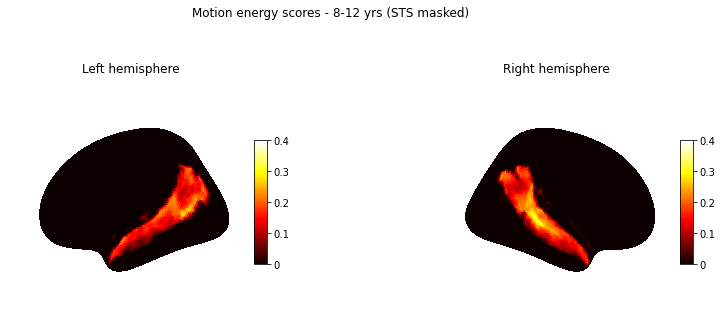

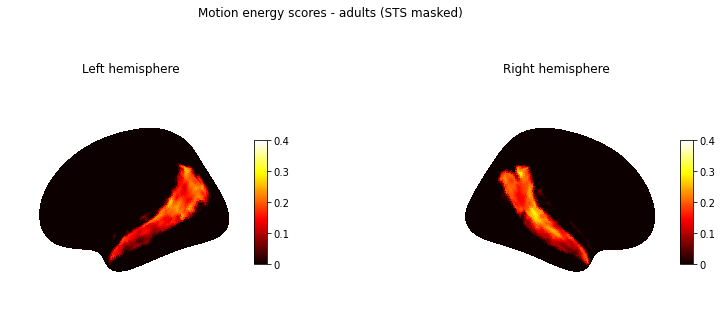

In [16]:
# subject data for Motion already loaded

# mask 3-4 yrs data - STS

moten_isc_volume_34yrs = make_vol(moten_scores_34yrs_unthresholded, mask)
moten_isc_volume_34yrs_array = moten_isc_volume_34yrs.get_fdata()
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
moten_sts_volume_34yrs = moten_isc_volume_34yrs_array.copy()
moten_sts_volume_34yrs[sts_mask_array] = 0
moten_sts_volume_34yrs_image = nib.Nifti1Image(moten_sts_volume_34yrs, affine=moten_isc_volume_34yrs.affine, header=moten_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=moten_sts_volume_34yrs_image, 
                            title='Motion energy scores - 3-4 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.4)

print(moten_isc_volume_34yrs_array[np.invert(sts_mask_array)].mean())

# mask 5 yrs data - STS need to edit!

moten_isc_volume_5yrs = make_vol(moten_scores_5yrs_unthresholded, mask)
moten_isc_volume_5yrs_array = moten_isc_volume_5yrs.get_fdata()
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
moten_sts_volume_5yrs = moten_isc_volume_5yrs_array.copy()
moten_sts_volume_5yrs[sts_mask_array] = 0
moten_sts_volume_5yrs_image = nib.Nifti1Image(moten_sts_volume_5yrs, affine=moten_isc_volume_5yrs.affine, header=moten_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=moten_sts_volume_5yrs_image, 
                            title='Motion energy scores - 5 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.4)

print(moten_isc_volume_5yrs_array[np.invert(sts_mask_array)].mean())

# mask 7 yrs data - STS need to edit!

moten_isc_volume_7yrs = make_vol(moten_scores_7yrs_unthresholded, mask)
moten_isc_volume_7yrs_array = moten_isc_volume_7yrs.get_fdata()
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
moten_sts_volume_7yrs = moten_isc_volume_7yrs_array.copy()
moten_sts_volume_7yrs[sts_mask_array] = 0
moten_sts_volume_7yrs_image = nib.Nifti1Image(moten_sts_volume_7yrs, affine=moten_isc_volume_7yrs.affine, header=moten_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=moten_sts_volume_7yrs_image, 
                            title='Motion energy scores - 7 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.4)

print(moten_isc_volume_7yrs_array[np.invert(sts_mask_array)].mean())


# mask 8-12 yrs data - STS need to edit!

moten_isc_volume_812yrs = make_vol(moten_scores_812yrs_unthresholded, mask)
moten_isc_volume_812yrs_array = moten_isc_volume_812yrs.get_fdata()
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
moten_sts_volume_812yrs = moten_isc_volume_812yrs_array.copy()
moten_sts_volume_812yrs[sts_mask_array] = 0
moten_sts_volume_812yrs_image = nib.Nifti1Image(moten_sts_volume_812yrs, affine=moten_isc_volume_812yrs.affine, header=moten_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=moten_sts_volume_812yrs_image, 
                            title='Motion energy scores - 8-12 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.4)

print(moten_isc_volume_812yrs_array[np.invert(sts_mask_array)].mean())


#mask adult data - STS

moten_isc_volume_adult = make_vol(moten_scores_adults_unthresholded, mask)
moten_isc_volume_adult_array = moten_isc_volume_adult.get_fdata()
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
moten_sts_volume_adult = moten_isc_volume_adult_array.copy()
moten_sts_volume_adult[sts_mask_array] = 0
moten_sts_volume_adult_image = nib.Nifti1Image(moten_sts_volume_adult, affine=moten_isc_volume_adult.affine, header=moten_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=moten_sts_volume_adult_image, 
                            title='Motion energy scores - adults (STS masked)', 
                            vis_threshold=0, vmax=0.4)

print(moten_isc_volume_adult_array[np.invert(sts_mask_array)].mean())

In [17]:
### get the encoding performance correlation score

sts_mask_array = STS_mask_resampled.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surface

### adults
print(subj_moten_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_moten_scores_adults_unthresholded # change subj data to shape of the brain
sts_adult_score = volume_adult[sts_mask_array, :].mean(axis=0)
print(sts_adult_score.mean())

## Chance comparison
null_distribution = generate_null_ROI(sts_adult_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = sts_adult_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 33)
0.17008748372523733
(5000,)
Observed Mean: 0.17008748372523733
Chance Level from Null Distribution: 0.00032301492735209404
P-value: 0.0
The observed result is significantly different from chance


In [18]:
### 3-4-yrs
print(subj_moten_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_moten_scores_34yrs_unthresholded # change subj data to shape of the brain
sts_34yrs_score = volume_34yrs[sts_mask_array, :].mean(axis=0)
print(sts_34yrs_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_score, sts_34yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_score) - np.mean(sts_34yrs_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(sts_34yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = sts_34yrs_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 31)
0.1600147600880098
(5000,)
0.010072723637227526
The difference between groups is not statistically significant.
0.3128
(5000,)
Observed Mean: 0.1600147600880098
Chance Level from Null Distribution: -0.000524650957448109
P-value: 0.0
The observed result is significantly different from chance


In [19]:
### 5-yrs
print(subj_moten_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_moten_scores_5yrs_unthresholded # change subj data to shape of the brain
sts_5yrs_score = volume_5yrs[sts_mask_array, :].mean(axis=0)
print(sts_5yrs_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_score, sts_5yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_score) - np.mean(sts_5yrs_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(sts_5yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = sts_5yrs_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 34)
0.15928524835269675
(5000,)
0.010802235372540575
The difference between groups is not statistically significant.
0.267
(5000,)
Observed Mean: 0.15928524835269675
Chance Level from Null Distribution: 0.0003682356810361856
P-value: 0.0
The observed result is significantly different from chance


In [20]:
### 7-yrs
print(subj_moten_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_moten_scores_7yrs_unthresholded # change subj data to shape of the brain
sts_7yrs_score = volume_7yrs[sts_mask_array, :].mean(axis=0)
print(sts_7yrs_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_score, sts_7yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_score) - np.mean(sts_7yrs_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(sts_7yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = sts_7yrs_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 23)
0.18187301658448335
(5000,)
-0.011785532859246023
The difference between groups is not statistically significant.
0.2868
(5000,)
Observed Mean: 0.18187301658448335
Chance Level from Null Distribution: -0.0007404404441950965
P-value: 0.0
The observed result is significantly different from chance


In [21]:

### 8-12-yrs
print(subj_moten_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_moten_scores_812yrs_unthresholded # change subj data to shape of the brain
sts_812yrs_score = volume_812yrs[sts_mask_array, :].mean(axis=0)
print(sts_812yrs_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_score, sts_812yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_score) - np.mean(sts_812yrs_score)
print(observed_difference)


# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant.")

print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(sts_812yrs_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = sts_812yrs_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 34)
0.1675658173166126
(5000,)
0.002521666408624723
The difference between groups is not statistically significant.
0.8298
(5000,)
Observed Mean: 0.1675658173166126
Chance Level from Null Distribution: 2.931171033484339e-05
P-value: 0.0
The observed result is significantly different from chance


<h1> Bar Plot Motion Scores

In [22]:
import seaborn as sns
sns.__version__

'0.10.1'

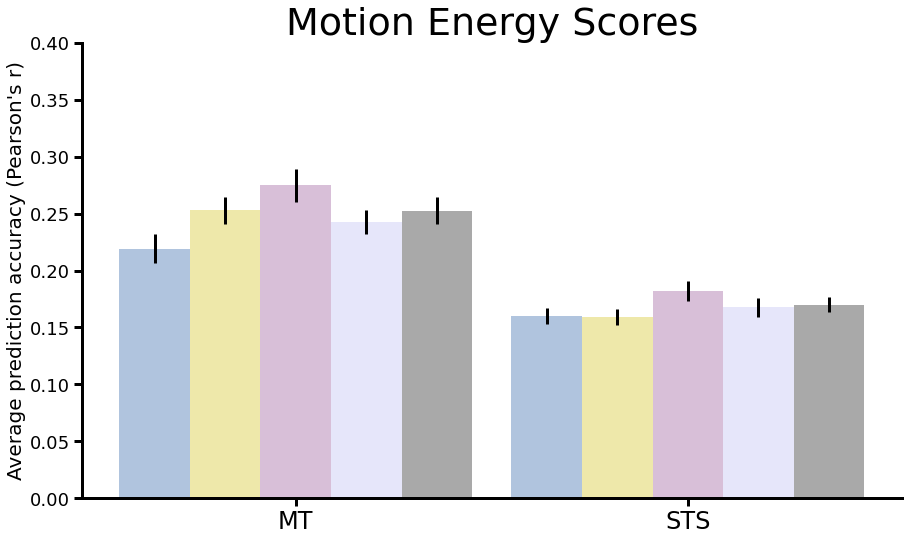

In [23]:
### motion energy: mean activation for each subject in MT for energy model


# Calculate the average of the array of individual subj average 
moten_MT_34yrs_mean = mt_34yrs_score.mean()
moten_MT_5yrs_mean = mt_5yrs_score.mean()
moten_MT_7yrs_mean = mt_7yrs_score.mean()
moten_MT_812yrs_mean = mt_812yrs_score.mean()
moten_MT_adults_mean = mt_adult_score.mean()

#std
moten_MT_34yrs_std = np.std(mt_34yrs_score)
moten_MT_5yrs_std= np.std(mt_5yrs_score)
moten_MT_7yrs_std= np.std(mt_7yrs_score)
moten_MT_812yrs_std= np.std(mt_812yrs_score)
moten_MT_adults_std = np.std(mt_adult_score)

#err
moten_MT_34yrs_err = np.std(mt_34yrs_score)/np.sqrt(len(mt_34yrs_score))
moten_MT_5yrs_err= np.std(mt_5yrs_score)/np.sqrt(len(mt_5yrs_score))
moten_MT_7yrs_err= np.std(mt_7yrs_score)/np.sqrt(len(mt_7yrs_score))
moten_MT_812yrs_err= np.std(mt_812yrs_score)/np.sqrt(len(mt_812yrs_score))
moten_MT_adults_err = np.std(mt_adult_score)/np.sqrt(len(mt_adult_score))

### Motion energy Data: mean activation for each subject in STS for energy model

# Calculate the average of the array of individual subj average 
moten_STS_34yrs_mean = sts_34yrs_score.mean()
moten_STS_5yrs_mean = sts_5yrs_score.mean()
moten_STS_7yrs_mean = sts_7yrs_score.mean()
moten_STS_812yrs_mean = sts_812yrs_score.mean()
moten_STS_adults_mean = sts_adult_score.mean()

#STD
moten_STS_34yrs_std = np.std(sts_34yrs_score)
moten_STS_5yrs_std= np.std(sts_5yrs_score)
moten_STS_7yrs_std= np.std(sts_7yrs_score)
moten_STS_812yrs_std= np.std(sts_812yrs_score)
moten_STS_adults_std = np.std(sts_adult_score)

moten_STS_34yrs_err = np.std(sts_34yrs_score)/np.sqrt(len(sts_34yrs_score))
moten_STS_5yrs_err= np.std(sts_5yrs_score)/np.sqrt(len(sts_5yrs_score))
moten_STS_7yrs_err= np.std(sts_7yrs_score)/np.sqrt(len(sts_7yrs_score))
moten_STS_812yrs_err= np.std(sts_812yrs_score)/np.sqrt(len(sts_812yrs_score))
moten_STS_adults_err = np.std(sts_adult_score)/np.sqrt(len(sts_adult_score))

# Define labels, positions, bar heights and error bar heights
labels = ['MT', 'STS']
X_axis = np.arange(len(labels))


moten_34 = [moten_MT_34yrs_mean, moten_STS_34yrs_mean]
error = [moten_MT_34yrs_err,moten_STS_34yrs_err]

moten_5 = [moten_MT_5yrs_mean, moten_STS_5yrs_mean]
error2 = [moten_MT_5yrs_err,moten_STS_5yrs_err ]

moten_7 = [moten_MT_7yrs_mean, moten_STS_7yrs_mean]
error3 = [moten_MT_7yrs_err,moten_STS_7yrs_err ]

moten_812 = [moten_MT_812yrs_mean, moten_STS_812yrs_mean]
error4 = [moten_MT_812yrs_err,moten_STS_812yrs_err ]

moten_adult = [moten_MT_adults_mean, moten_STS_adults_mean]
error5 = [moten_MT_adults_err, moten_STS_adults_err]


# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(context='poster', style='white', rc=custom_params)
_, ax = plt.subplots(figsize=(14.69, 8.38))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(width=3, length=8)
ax.bar(X_axis - 0.36, moten_34, 0.18, yerr=error, label = '3-4 yrs', color = 'lightsteelblue', error_kw=dict(lw=3))
ax.bar(X_axis - 0.18, moten_5, 0.18, yerr= error2, label = '5 yrs', color ='palegoldenrod', error_kw=dict(lw=3))
ax.bar(X_axis + 0.0, moten_7, 0.18, yerr= error3, label = '7 yrs', color ='thistle', error_kw=dict(lw=3))
ax.bar(X_axis + 0.18, moten_812, 0.18, yerr= error4, label = '8-12 yrs', color ='lavender', error_kw=dict(lw=3))
ax.bar(X_axis + 0.36, moten_adult, 0.18, yerr= error5, label = 'adults', color ='darkgrey', error_kw=dict(lw=3))

ax.set_xticks([0,1])
ax.set_xticklabels(labels, fontsize=24)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylabel("Average prediction accuracy (Pearson's r)", fontsize=20)
ax.set_title("Motion Energy Scores", fontsize=38)
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40])
#ax.set_ylim([0, 0.2])
ax.legend([], [], frameon=False)
plt.savefig('moten_only_no_scatterplot.pdf')
plt.show()

